--------------------------------------

# Prédiction de revenus : cibler de nouveaux clients potentiels

Employé dans une banque, présente dans de nombreux pays à travers le monde. Celle-ci souhaite cibler de nouveaux clients potentiels, plus particulièrement les jeunes en âge d'ouvrir leur tout premier compte bancaire.

Cependant, elle souhaite cibler les prospects les plus susceptibles d'avoir, plus tard dans leur vie, de hauts revenus.

#### La mission confiée à mon équipe est de créer un modèle permettant de déterminer le revenu potentiel d'une personne.

"Quelles informations avons-nous ?" Uniquement le revenu des parents, car nous allons cibler les enfants de nos clients actuels, ainsi que le pays où ils habitent. Et une dernière chose : ce modèle doit être valable pour la plupart des pays du monde.

Avec aussi peu de données disponibles, cela semble être un sacré challenge !

Ainsi, le modèle proposé sera une régression linéaire avec 3 variables :

le revenu des parents (nos clients actuels);

le revenu moyen du pays dans lequel habite le prospect;

l'indice de Gini calculé sur les revenus des habitants du pays en question.

#### L'unité utilisée dans la colonne income de la World Income Distribution est le $PPP. Cette unité est calculée par la Banque mondiale, selon la méthode Eltöte-Köves-Szulc.

Purchasing Power Parity (PPP) = Parité du Pouvoir d'Achat (PPA)\ La PPA est une méthode utilisée en économie pour établir une comparaison entre pays du pouvoir d'achat des devises nationales, une simple utilisation des taux de change ne permet pas de le faire.

Le pouvoir d'achat d’une quantité donnée d’argent dépend en effet du coût de la vie, c’est-à-dire du niveau général des prix. La PPA permet de mesurer combien une devise permet d’acheter de biens et services dans chacune des zones que l’on compare.

La monnaie couramment utilisée comme référence est le dollar américain, pris à une année donnée.

#### La population de l'échantillon a été découpée en quantiles.

Chaque quantile une classe de revenu. 

Ainsi, la valeur de la colonne income pour un quantile donné peut être vu comme le revenu moyen des personnes appartenant à la classe de revenu correspondante à ce quantile.

Ici les données de la World Income Distribution présentent pour chaque pays les centiles de la distribution des revenus de leur population respective.



## Mission1

### Résumez les données utilisées :

année(s) des données utilisées ;

nombre de pays présents ;

population couverte par l'analyse (en termes de pourcentage de la population mondiale).

In [1]:
#Librairies Python pour le traitement des données
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.metrics import pairwise_distances_argmin_min
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
# system libraries
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
data = pd.read_csv("data-projet7.csv", decimal=",")
data.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [4]:
#tail affiche les 10 dernières lignes du DF
data.tail()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
11594,COD,2008,96,100,810.6233,303.19305
11595,COD,2008,97,100,911.7834,303.19305
11596,COD,2008,98,100,1057.8074,303.19305
11597,COD,2008,99,100,1286.6029,303.19305
11598,COD,2008,100,100,2243.1226,303.19305


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [6]:
#taille du DF
data.shape

(11599, 6)

In [7]:
# la méthode describe pour trouver les statistiques des colonnes numériques
# Description du fichier
data.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


In [8]:
# Comptage des valeurs manquantes
data.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
display(data.shape)

(11599, 6)

In [11]:
data['country'].unique()

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

In [12]:
data['income'].unique()

array([ 728.89795,  916.66235, 1010.916  , ..., 1057.8074 , 1286.6029 ,
       2243.1226 ])

remarque : Chaque pays doit disposer de 100 quantiles, "data" renvoie 116 pays pour 11599 observations, il manque un quantile dans les données.

In [13]:
#Agrégation des données selon les pays, puis application d'une fonction .nunique()
data_nunique = data.groupby('country').nunique()
data_nunique[data_nunique['quantile'] < 100]

,year_survey,quantile,nb_quantiles,income,gdpppp
country,,,,,
LTU,1,99,1,99,1


In [14]:
# Description par année
data.groupby(by=['year_survey']).nunique()

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2004,1,100,1,100,1
2006,5,100,1,500,5
2007,15,100,1,1500,15
2008,76,100,1,7598,75
2009,12,100,1,1200,11
2010,6,100,1,600,6
2011,1,100,1,100,1


In [15]:
#Visualisation des 99 individus du pays 'LTU'
with pd.option_context('display.max_rows', 100):
    print(data[data.country == 'LTU'])

     country  year_survey  quantile  nb_quantiles      income   gdpppp
6200     LTU         2008         1           100    566.3453  17571.0
6201     LTU         2008         2           100   1147.0587  17571.0
6202     LTU         2008         3           100   1490.8408  17571.0
6203     LTU         2008         4           100   1746.5715  17571.0
6204     LTU         2008         5           100   1842.9542  17571.0
6205     LTU         2008         6           100   1925.8641  17571.0
6206     LTU         2008         7           100   2048.3857  17571.0
6207     LTU         2008         8           100   2173.7112  17571.0
6208     LTU         2008         9           100   2302.0857  17571.0
6209     LTU         2008        10           100   2361.6480  17571.0
6210     LTU         2008        11           100   2452.7578  17571.0
6211     LTU         2008        12           100   2602.3857  17571.0
6212     LTU         2008        13           100   2732.9660  17571.0
6213  

In [16]:
display(data.head())
display(data.shape)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


(11599, 6)

In [17]:
#Calcul du quantile manquant (41)par la moyenne des quantiles -1 et +1 (40 et 42)
ltu_41 = data.loc[(data['country'] == 'LTU') & (data['quantile'] == 40) 
                  | (data['country'] == 'LTU') & (data['quantile'] == 42)]['income'].mean()
ltu_41

4882.14065

In [18]:
# Création de la ligne manquante (valeur moyenne entre q40 et q42)
ltu_41 = pd.DataFrame({'country' :  ['LTU'],
                        'year_survey' : [2008],
                        'quantile' : [41],
                        'nb_quantiles' : [100],
                        'income' : [ltu_41],
                        'gdpppp'  :  [17571.0]})
ltu_41

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,LTU,2008,41,100,4882.14065,17571.0


In [19]:
#Intégration de la précédente ligne dans le dataframe "data"
data = pd.concat([data, ltu_41], ignore_index=True, sort=True)
display(data.shape)
data.head()

(11600, 6)

,country,gdpppp,income,nb_quantiles,quantile,year_survey
0,ALB,7297.0,728.89795,100,1,2008
1,ALB,7297.0,916.66235,100,2,2008
2,ALB,7297.0,1010.91600,100,3,2008
3,ALB,7297.0,1086.90780,100,4,2008
4,ALB,7297.0,1132.69970,100,5,2008


In [20]:
#Vérification des années stockées dans la variable 'year_survey'
data['year_survey'].sort_values(ascending=True).unique()

array([2004, 2006, 2007, 2008, 2009, 2010, 2011], dtype=int64)

Nous verrons plus loin la part de chaque année, sont-elles toutes représentatives?

In [21]:
#Création d'un échantillon de travail, le dataframe "data_set"
#Deux colonnes seront renommées pour la suite de l'analyse
data_set = data.copy()
data_set.rename(columns={'country': 'country_code', 'year_survey': 'year'}, inplace=True)
data_set

,country_code,gdpppp,income,nb_quantiles,quantile,year
0,ALB,7297.00000,728.89795,100,1,2008
1,ALB,7297.00000,916.66235,100,2,2008
2,ALB,7297.00000,1010.91600,100,3,2008
3,ALB,7297.00000,1086.90780,100,4,2008
4,ALB,7297.00000,1132.69970,100,5,2008
...,...,...,...,...,...,...
11595,COD,303.19305,911.78340,100,97,2008
11596,COD,303.19305,1057.80740,100,98,2008
11597,COD,303.19305,1286.60290,100,99,2008
11598,COD,303.19305,2243.12260,100,100,2008


### Intégration des noms de pays

Il sera plus facile d'avoir chaque pays en face des codes.

In [22]:
#Enrichissement de l'échantillon par l'intégration des noms de pays selon leurs codes
pays_list = pd.read_csv('sql-pays.csv', header=None)
pays_list.rename(columns={3:'country_code', 5:'country'}, inplace=True)
pays_list = pays_list.iloc[:, [3,5]]
pays_list.head()

,country_code,country
0,AFG,Afghanistan
1,ALB,Albania
2,ATA,Antarctica
3,DZA,Algeria
4,ASM,American Samoa


In [23]:
#Identification des codes pays présents dans l'échantillon "data_set" et non dans le référentiel pays "pays_list"
l1 = list(data_set['country_code'].unique())
l2 = list(pays_list['country_code'].unique())
[country for country in l1 if country not in l2]

['XKX', 'MNE', 'SRB']

In [24]:
#Intégration de ces 3 pays dans le référentiel pays "pays_list"
missing_country = pd.DataFrame([
    ['XKX', 'Kosovo'], 
    ['MNE', 'Montenegro'],
    ['SRB', 'Serbia']], 
    columns=['country_code', 'country'])

pays_list = pd.concat([pays_list, missing_country], ignore_index=True, axis=0)
pays_list.head()

,country_code,country
0,AFG,Afghanistan
1,ALB,Albania
2,ATA,Antarctica
3,DZA,Algeria
4,ASM,American Samoa


In [25]:
#Nombre de pays recensés dans "pays_list"
print(str(len(pays_list)) + ' Pays dans notre liste de correspondance code pays / Pays')

244 Pays dans notre liste de correspondance code pays / Pays


In [26]:
#doublon, les pays sont bien distints
str(pays_list.duplicated().sum())

'0'

In [27]:
#Intégration dans l'échantillon "df" des noms de pays selon leur code pays
data_set = pd.merge(data_set, pays_list, how='left', on='country_code')
data_set = data_set[['country_code', 'country', 'year', 'quantile', 'nb_quantiles', 'income', 'gdpppp']]
display(data_set.head())
display(data_set.shape)

,country_code,country,year,quantile,nb_quantiles,income,gdpppp
0,ALB,Albania,2008,1,100,728.89795,7297.0
1,ALB,Albania,2008,2,100,916.66235,7297.0
2,ALB,Albania,2008,3,100,1010.91600,7297.0
3,ALB,Albania,2008,4,100,1086.90780,7297.0
4,ALB,Albania,2008,5,100,1132.69970,7297.0


(11600, 7)

## Intégration des populations

il est intéressant d'avoir une idée du poids de la population pour chacun des pays.

In [28]:
#Enrichissement de l'échantillon "data_set" par l'intégration des populations par année
#Source http://www.fao.org/faostat/fr/#data/OA
pop = pd.read_csv('Feuille pop- Feuille 1.csv')
pop

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2004,2004,1000 persons,24726.684,X,International reliable sources,NaN
1,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2006,2006,1000 persons,26433.049,X,International reliable sources,NaN
2,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2007,2007,1000 persons,27100.536,X,International reliable sources,NaN
3,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,27722.276,X,International reliable sources,NaN
4,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2009,2009,1000 persons,28394.813,X,International reliable sources,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,OA,Annual population,181,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2007,2007,1000 persons,12255.922,X,International reliable sources,NaN
1617,OA,Annual population,181,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,12379.549,X,International reliable sources,NaN
1618,OA,Annual population,181,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2009,2009,1000 persons,12526.968,X,International reliable sources,NaN
1619,OA,Annual population,181,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2010,2010,1000 persons,12697.723,X,International reliable sources,NaN


In [29]:
pop.rename(columns={'Area':'country', 'Year':'year', 'Value':'population'}, inplace=True)
pop = pop.iloc[:, [3, 9, 11]]
pop['population'] = (pop['population']*1000)

display(pop.head())
display(pop.shape)

,country,year,population
0,Afghanistan,2004,24726684.0
1,Afghanistan,2006,26433049.0
2,Afghanistan,2007,27100536.0
3,Afghanistan,2008,27722276.0
4,Afghanistan,2009,28394813.0


(1621, 3)

In [30]:
#Identification des pays avec différence d'intitulé entre "data_set" et "pop"
l1 = list(data_set['country'].unique())
l2 = list(pop['country'].unique())
[pays for pays in l1 if pays not in l2]

['Bolivia',
 'Central African',
 'Czech Republic',
 'Islamic Republic of Iran',
 'Kosovo',
 'The Former Yugoslav Republic of Macedonia',
 'Sudan',
 'Swaziland',
 'Taiwan',
 'United Republic Of Tanzania',
 'United States',
 'Venezuela',
 'Vietnam',
 'Occupied Palestinian Territory',
 'The Democratic Republic Of The Congo']

In [31]:
#Fonction de retraitement des noms de pays exposant des écarts d'intitulé
def rename_country(country):
    if (country == 'Bolivia (Plurinational State of)'):
        return 'Bolivia'
    elif country == 'Central African Republic':
        return 'Central African'
    elif country == 'Czechia':
        return 'Czech Republic' 
    elif country == 'Iran (Islamic Republic of)':
        return 'Islamic Republic of Iran' 
    elif country == 'North Macedonia':
        return 'The Former Yugoslav Republic of Macedonia' 
    elif country == 'Sudan (former)':
        return 'Sudan' 
    elif country == 'Eswatini':
        return 'Swaziland' 
    elif country == 'China, Taiwan Province of':
        return 'Taiwan'
    elif country == 'United Republic of Tanzania':
        return 'United Republic Of Tanzania' 
    elif country == 'United States of America':
        return 'United States' 
    elif country == 'Venezuela (Bolivarian Republic of)':
        return 'Venezuela' 
    elif country == 'Viet Nam':
        return 'Vietnam'
    elif country == 'Palestine':
        return 'Occupied Palestinian Territory' 
    elif country == 'Congo':
        return 'The Democratic Republic Of The Congo'
    else :
        return country

In [32]:
#Application de la fonction rename_country()s ur la Series pop['country']
#Utilisation de la méthode .apply()
pop['country'] = pop['country'].apply(rename_country)
pop

,country,year,population
0,Afghanistan,2004,24726684.0
1,Afghanistan,2006,26433049.0
2,Afghanistan,2007,27100536.0
3,Afghanistan,2008,27722276.0
4,Afghanistan,2009,28394813.0
...,...,...,...
1616,Zimbabwe,2007,12255922.0
1617,Zimbabwe,2008,12379549.0
1618,Zimbabwe,2009,12526968.0
1619,Zimbabwe,2010,12697723.0


In [33]:
#Intégration des populations dans l'échantillon "df" par méthode .merge() selon 'year' et 'country'
data_set = pd.merge(data_set, pop, how='left', on=['year', 'country'])
display(data_set.head())
display(data_set.shape)

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0


(11600, 8)

In [34]:
#Vérification des valeurs manquantes sur la Series 'gdpppp' et 'population'
display(data_set[data_set['gdpppp'].isna()]['country_code'].unique())
display(data_set[data_set['population'].isna()]['country_code'].unique())

array(['XKX', 'PSE'], dtype=object)

array(['XKX'], dtype=object)

In [35]:
#Intégration des valeurs manquantes 'gdpppp' et 'population' sur le code pays XKX (Kosovo)
#Utilisation de la méthode .fillna() avec restriction selon les pays concernés
#Intégration des valeurs manquantes 'gdpppp' et 'population' sur le code pays XKX (Kosovo)
#Utilisation de la méthode .fillna() avec restriction selon les pays concernés
#Source https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2009&locations=XK&start=2008&view=chart
values = {'gdpppp': 7249, 'population': 1747383}
data_set.iloc[5800:5900, :].fillna(value=values, inplace=True)

#Intégration de la valeur manquante 'gdpppp' sur le code pays PSE (Occupied Palestinian Territory)
#Source https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2009&locations=XK&start=2008&view=chart
values = {'gdpppp': 3695.0}
data_set.iloc[11199:11299, :].fillna(value=values, inplace=True)



## Intégration des indices de Gini

L'indice de Gini fait parti des variables explicatives, il permet de déterminer la répartition des richesses au sein d'une population d'un pays. Indice compris entre 0 et 1.

In [36]:
ind_gini = pd.read_csv('Feuille indice-gini - Feuille 2.csv', skiprows=4).reset_index()
ind_gini.head()

,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Angola,AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Albania,ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Andorra,AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Identification des mêmes années que celles de l'échantillon "data_set"
gini_columns = []
for value in gini_columns:
    gini_columns.append(value)
    
gini_vars = [year for year in gini_columns if year in (['2004', '2006', '2007', '2008', '2009', '2010', '2011'])]
gini_vars

[]

In [38]:
#Mise en forme du dataframe pour obtenir uniquement les indices de Gini disponibles sur les années ci-dessus
gini_2 = pd.melt(ind_gini, id_vars =['Country Code', 'Country Name'], value_vars = gini_vars, var_name ='year', 
                    value_name ='gini')


In [39]:
gini_2.rename(columns={'Country Code':'country_code', 'Country Name':'country'}, inplace=True)
gini_2['gini'] = round(gini_2['gini']/100, 2)
gini_2.dropna(inplace=True)
gini_2['year'] = gini_2['year'].astype(int)
gini_2

,country_code,country,year,gini


In [40]:
#Jointure des indices de Gini "gini_melt" avec l'échantillon "df"
data_set = pd.merge(data_set, gini_2, how='left', on=['country_code', 'country', 'year'])
data_set

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,3002678.0,NaN
1,ALB,Albania,2008,2,100,916.66235,7297.00000,3002678.0,NaN
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,3002678.0,NaN
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,3002678.0,NaN
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,3002678.0,NaN
...,...,...,...,...,...,...,...,...,...
11595,COD,The Democratic Republic Of The Congo,2008,97,100,911.78340,303.19305,4011486.0,NaN
11596,COD,The Democratic Republic Of The Congo,2008,98,100,1057.80740,303.19305,4011486.0,NaN
11597,COD,The Democratic Republic Of The Congo,2008,99,100,1286.60290,303.19305,4011486.0,NaN
11598,COD,The Democratic Republic Of The Congo,2008,100,100,2243.12260,303.19305,4011486.0,NaN


In [41]:
#Combien d'indices de Gini manque t-il?
missing_gini = data_set[data_set['gini'].isna()][['country_code', 'country', 'year']]
missing_country = list(missing_gini['country_code'].unique())
len(missing_country)

116

In [42]:
#Listing de ces 116 pays
print(missing_country)

['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN', 'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE', 'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ', 'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD']


In [43]:
#Isolement des pays selon les années dont l'indice de Gini est manquant
missing_gini = data_set[data_set.isna().any(axis=1)].drop_duplicates(subset=['country_code', 'quantile', 'year'])
missing_gini

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,3002678.0,NaN
1,ALB,Albania,2008,2,100,916.66235,7297.00000,3002678.0,NaN
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,3002678.0,NaN
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,3002678.0,NaN
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,3002678.0,NaN
...,...,...,...,...,...,...,...,...,...
11595,COD,The Democratic Republic Of The Congo,2008,97,100,911.78340,303.19305,4011486.0,NaN
11596,COD,The Democratic Republic Of The Congo,2008,98,100,1057.80740,303.19305,4011486.0,NaN
11597,COD,The Democratic Republic Of The Congo,2008,99,100,1286.60290,303.19305,4011486.0,NaN
11598,COD,The Democratic Republic Of The Congo,2008,100,100,2243.12260,303.19305,4011486.0,NaN


In [44]:

#Calcul des indices de Gini manquants

list_gini = []
for code in missing_gini['country_code'] : 
    dep = missing_gini[missing_gini['country_code'] == code]['income'].values
    n = len(dep)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()

    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
    S = 0.5 - AUC 
    gini = round(2*S, 2)
    list_gini.append(gini)  

In [45]:
#Intégration des indices de Gini dans le dataframe "find_gini" issu de "missing_gini"
find_gini = missing_gini.copy()
find_gini.loc[:,'gini'] = list_gini
find_gini

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,3002678.0,0.30
1,ALB,Albania,2008,2,100,916.66235,7297.00000,3002678.0,0.30
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,3002678.0,0.30
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,3002678.0,0.30
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,3002678.0,0.30
...,...,...,...,...,...,...,...,...,...
11595,COD,The Democratic Republic Of The Congo,2008,97,100,911.78340,303.19305,4011486.0,0.44
11596,COD,The Democratic Republic Of The Congo,2008,98,100,1057.80740,303.19305,4011486.0,0.44
11597,COD,The Democratic Republic Of The Congo,2008,99,100,1286.60290,303.19305,4011486.0,0.44
11598,COD,The Democratic Republic Of The Congo,2008,100,100,2243.12260,303.19305,4011486.0,0.44


In [46]:
#Intégration des valeurs manquantes dans l'échantillon de travail "data_set"
for code in list(find_gini['country_code'].unique()) :
    data_set.loc[data_set['country_code'] == code,'gini'] = (find_gini.loc[find_gini['country_code'] == code,'gini'])
    
#Visualisation rapide des données
data_set

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,3002678.0,0.30
1,ALB,Albania,2008,2,100,916.66235,7297.00000,3002678.0,0.30
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,3002678.0,0.30
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,3002678.0,0.30
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,3002678.0,0.30
...,...,...,...,...,...,...,...,...,...
11595,COD,The Democratic Republic Of The Congo,2008,97,100,911.78340,303.19305,4011486.0,0.44
11596,COD,The Democratic Republic Of The Congo,2008,98,100,1057.80740,303.19305,4011486.0,0.44
11597,COD,The Democratic Republic Of The Congo,2008,99,100,1286.60290,303.19305,4011486.0,0.44
11598,COD,The Democratic Republic Of The Congo,2008,100,100,2243.12260,303.19305,4011486.0,0.44


Tous les indices de Gini ont été intégrés, aucun pays n'a été exclu de l'analyse, l'échantillon a été enrichi.

#### Brief sur les données de l'échantillon de travail

In [47]:
#Rappel de l'échantillon final "data_set" après retraitement des données
display(data_set.head())
display(data_set.tail())
display(data_set.shape)

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0,0.3
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0,0.3
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0,0.3
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0,0.3
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0,0.3


,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
11595,COD,The Democratic Republic Of The Congo,2008,97,100,911.78340,303.19305,4011486.0,0.44
11596,COD,The Democratic Republic Of The Congo,2008,98,100,1057.80740,303.19305,4011486.0,0.44
11597,COD,The Democratic Republic Of The Congo,2008,99,100,1286.60290,303.19305,4011486.0,0.44
11598,COD,The Democratic Republic Of The Congo,2008,100,100,2243.12260,303.19305,4011486.0,0.44
11599,LTU,Lithuania,2008,41,100,4882.14065,17571.00000,3212865.0,0.33


(11600, 9)

In [48]:
#Vérification des éventuelles valeurs manquantes et/ou doublons dans l'échantillon "data_set"
display(data_set.isna().any())
display(data_set.duplicated().sum())


country_code    False
country         False
year            False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
population      False
gini            False
dtype: bool

0

In [49]:
#Visualisation rapide du type de variables 
data_set.dtypes

country_code     object
country          object
year              int64
quantile          int64
nb_quantiles      int64
income          float64
gdpppp          float64
population      float64
gini            float64
dtype: object

In [50]:
#Description rapide des variables quantitatives
data_set.describe()

,year,quantile,nb_quantiles,income,gdpppp,population,gini
count,11600.000000,11600.000000,11600.0,11600.000000,1.160000e+04,1.160000e+04,11600.000000
mean,2007.982759,50.500000,100.0,6069.121925,4.944692e+04,5.346517e+07,0.378707
std,0.909593,28.867314,0.0,9413.786596,3.966301e+05,1.702667e+08,0.089326
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02,3.108560e+05,0.230000
25%,2008.000000,25.750000,100.0,900.768507,2.577500e+03,4.451312e+06,0.310000
50%,2008.000000,50.500000,100.0,2403.492950,7.532500e+03,1.420979e+07,0.360000
75%,2008.000000,75.250000,100.0,7515.313700,1.819625e+04,3.904949e+07,0.432500
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06,1.376266e+09,0.670000


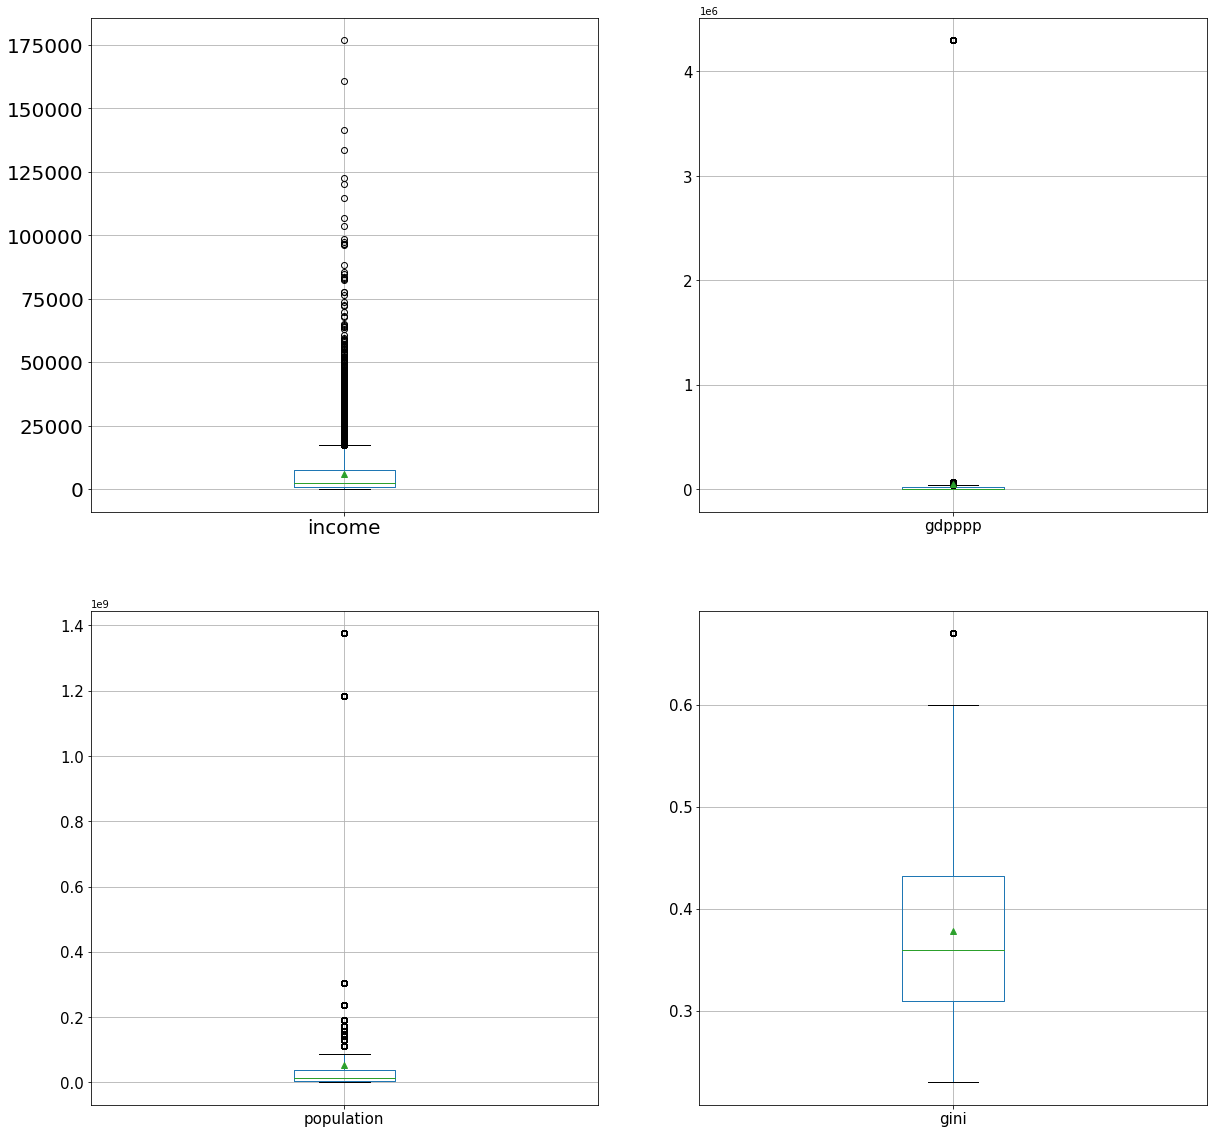

In [51]:
#Approche visuelle par Boxplot de la distribution des variables et des éventuels outliers
plt.figure(figsize=(20, 20))

plt.subplot(221)
data_set.iloc[:, [5]].boxplot(fontsize=20, widths=0.2, showmeans=True)
plt.subplot(222)
data_set.iloc[:, [6]].boxplot(fontsize=15, widths=0.2, showmeans=True)
plt.subplot(223)
data_set.iloc[:, [7]].boxplot(fontsize=15, widths=0.2, showmeans=True)
plt.subplot(224)
data_set.iloc[:, [8]].boxplot(fontsize=15, widths=0.2, showmeans=True)


plt.show()

In [52]:
#Identification de quelques outliers afin de vérifier que ces valeurs puissent être possibles
display(data_set.sort_values(by='population', ascending=False).iloc[:1, :])
display(data_set.sort_values(by='gdpppp', ascending=False).iloc[:1, :])
display(data_set.sort_values(by='gini', ascending=False).iloc[:1, :])

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
1798,CHN,China,2007,99,100,11071.51,5712.0,1.376266e+09,0.48


,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
3200,FJI,Fiji,2008,1,100,308.17334,4300332.0,845361.0,0.43


,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
11450,ZAF,South Africa,2008,52,100,2181.245,9602.0,49779471.0,0.67


Les outliers sont des valeurs tout à fait cohérentes avec leur pays d'affectation. Il n'y a pas de surprise après vérification…

### Bilan des pays dans l'échantillon

In [53]:
#Identification du nombre de pays par année 
#Recherche des années les plus représentatives…
demography_group = data_set[['year', 'country']].drop_duplicates().groupby('year').count().reset_index()
demography_group.rename(columns={'country':'country_quantity'}, inplace=True)
demography_group

,year,country_quantity
0,2004,1
1,2006,5
2,2007,15
3,2008,76
4,2009,12
5,2010,6
6,2011,1


In [54]:
data_set

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.00000,3002678.0,0.30
1,ALB,Albania,2008,2,100,916.66235,7297.00000,3002678.0,0.30
2,ALB,Albania,2008,3,100,1010.91600,7297.00000,3002678.0,0.30
3,ALB,Albania,2008,4,100,1086.90780,7297.00000,3002678.0,0.30
4,ALB,Albania,2008,5,100,1132.69970,7297.00000,3002678.0,0.30
...,...,...,...,...,...,...,...,...,...
11595,COD,The Democratic Republic Of The Congo,2008,97,100,911.78340,303.19305,4011486.0,0.44
11596,COD,The Democratic Republic Of The Congo,2008,98,100,1057.80740,303.19305,4011486.0,0.44
11597,COD,The Democratic Republic Of The Congo,2008,99,100,1286.60290,303.19305,4011486.0,0.44
11598,COD,The Democratic Republic Of The Congo,2008,100,100,2243.12260,303.19305,4011486.0,0.44


In [55]:
data_set['population'].sum()

620195946000.0

In [56]:
popu_year = pd.DataFrame(data_set[data_set['quantile'] == 1].groupby(['year'])['population'].sum()/10).reset_index()
popu_year                         

,year,population
0,2004,1782782.5
1,2006,28754800.0
2,2007,275026674.0
3,2008,227197619.1
4,2009,47555945.9
5,2010,38383244.4
6,2011,1494880.1


In [57]:
#Intégration de la population mondiale par année
#Source https://donnees.banquemondiale.org/indicateur/SP.POP.TOTL
world_pop = pd.read_csv('API_SP.POP.TOTL_DS2_fr_csv_v2_3733506.csv', skiprows=3)
world_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,NaN,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,NaN,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0,NaN
262,"Yémen, Rép. du",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,Afrique du Sud,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambie,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [58]:

world_pop = world_pop[['Country Name', '2004', '2006', '2007', '2008', '2009', '2010', '2011']]
world_pop = world_pop[world_pop['Country Name'] == 'Monde'].T.reset_index()

world_pop.drop(world_pop.index[0], inplace=True)
world_pop.rename(columns={'index': 'year', 259: 'pop_world'}, inplace=True)



In [59]:
world_pop = world_pop
world_pop

,year,pop_world
1,2004,6431527221.0
2,2006,6592711655.0
3,2007,6674181848.0
4,2008,6757000414.0
5,2009,6839553692.0
6,2010,6921854591.0
7,2011,7003760440.0


In [60]:
#Merge des populations avec pourcentage de la part mondiale
#Recherche des années les plus représentatives…
data_T = pd.merge(demography_group, popu_year, on='year')

data_T

,year,country_quantity,population
0,2004,1,1782782.5
1,2006,5,28754800.0
2,2007,15,275026674.0
3,2008,76,227197619.1
4,2009,12,47555945.9
5,2010,6,38383244.4
6,2011,1,1494880.1


In [61]:
data_T['year'] = data_T['year'].astype(str)
data_T = pd.merge(data_T, world_pop,on='year')
data_T

,year,country_quantity,population,pop_world
0,2004,1,1782782.5,6431527221.0
1,2006,5,28754800.0,6592711655.0
2,2007,15,275026674.0,6674181848.0
3,2008,76,227197619.1,6757000414.0
4,2009,12,47555945.9,6839553692.0
5,2010,6,38383244.4,6921854591.0
6,2011,1,1494880.1,7003760440.0


In [62]:
data_T.dtypes

year                 object
country_quantity      int64
population          float64
pop_world            object
dtype: object

In [63]:
data_T['pop_world'] = data_T['pop_world'].astype('float')
data_T.dtypes

year                 object
country_quantity      int64
population          float64
pop_world           float64
dtype: object

In [64]:
data_T['%_world_population'] = round((data_T['population']/(data_T['pop_world']/10)*100), 2)
data_T

,year,country_quantity,population,pop_world,%_world_population
0,2004,1,1782782.5,6.431527e+09,0.28
1,2006,5,28754800.0,6.592712e+09,4.36
2,2007,15,275026674.0,6.674182e+09,41.21
3,2008,76,227197619.1,6.757000e+09,33.62
4,2009,12,47555945.9,6.839554e+09,6.95
5,2010,6,38383244.4,6.921855e+09,5.55
6,2011,1,1494880.1,7.003760e+09,0.21


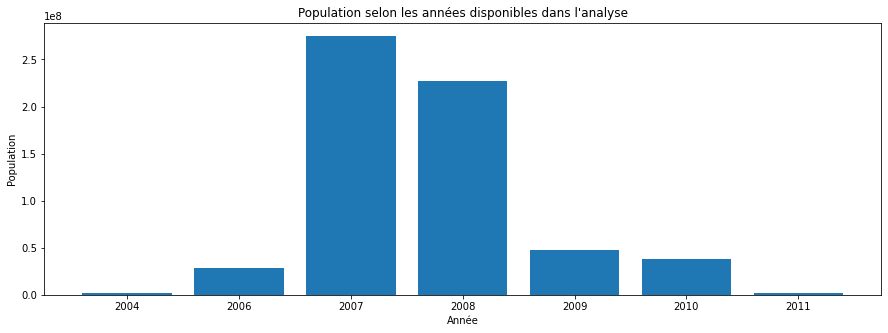

In [65]:
#Visualisation 
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(data_T['year'], data_T['population'])

plt.xlabel('Année')
plt.ylabel('Population')
plt.title("Population selon les années disponibles dans l'analyse")


plt.show()

--------------------------

# Mission2

## Étude de la diversité des pays

Le but est de montrer la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenu (axe des abscisses) pour 5 à 10 pays choisis pour montrer leur diversité.

Il est également nécessaire de représenter la courbe de Lorenz de chacun des pays choisis. Pour chacun de ces pays, il sera aussi préciser l'évolution de l'indice de Gini au fil des ans. Les pays seront classés par indice de Gini. Puis en conclusion, j'exprimerai la moyenne des 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible.

In [66]:
#Rappel de l'échantillon "data_set" traité dans l'analyse
data_set.head()

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0,0.3
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0,0.3
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0,0.3
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0,0.3
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0,0.3


In [67]:
#Calcul du revenu moyen du pays dans lequel habite notre prospect
data_income_Med = data_set[['country_code','income']].groupby('country_code').mean().reset_index()


In [68]:
data_income_Med.rename(columns={'income':'income_Med'}, inplace=True)
data_set = data_set.merge(data_income_Med, how='left', on='country_code')
display(data_set .shape)
display(data_set .head())   

(11600, 10)

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_Med
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0,0.3,2994.829902
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0,0.3,2994.829902
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0,0.3,2994.829902
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0,0.3,2994.829902
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0,0.3,2994.829902


###  Le but ici est de réduire la dimension de nos données afin de faciliter l'analyse. Le partionnement sera fait à l'aide d'un algorithme non-supervisé, le k-means.

In [69]:
#Clustering fait à partir d'une copie de l'échantillon, ici nommée "df_clustering"
data_clustering = data_set.copy()
data_clustering = data_clustering[data_clustering['country'] != 'Fiji']

La visualisation précédente des distributions de nos variables avait exposée quelques outliers. Le pays Fiji sera exclu du clustering car sa valeur du gdpppp est très influente.

In [70]:
#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()
data_clustering.set_index('country', inplace=True)
data_clustering.head()

,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_Med
country,,,,,,,,,
Albania,ALB,2008,1,100,728.89795,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,2,100,916.66235,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,3,100,1010.91600,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,4,100,1086.90780,7297.0,3002678.0,0.3,2994.829902
Albania,ALB,2008,5,100,1132.69970,7297.0,3002678.0,0.3,2994.829902


In [71]:
#Par simplification (gain en temps de calcul), le clustering sera fait sur le premier quantile
#Suppression des lignes par méthode .drop_duplicates()
data_clustering.drop_duplicates(subset=['country_code'], inplace=True)
data_clustering

,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_Med
country,,,,,,,,,
Albania,ALB,2008,1,100,728.897950,7297.00000,3002678.0,0.30,2994.829902
Argentina,ARG,2008,1,100,254.089420,13220.00000,40080160.0,0.45,5847.884654
Armenia,ARM,2008,1,100,366.617800,5611.00000,2907618.0,0.26,1628.382785
Austria,AUT,2008,1,100,2958.076400,36193.00000,8341532.0,0.28,16637.600204
Azerbaijan,AZE,2008,1,100,397.539830,8101.00000,8821873.0,0.31,2357.429023
...,...,...,...,...,...,...,...,...,...
Vietnam,VNM,2006,1,100,234.266950,2578.00000,84617540.0,0.38,1377.773966
Occupied Palestinian Territory,PSE,2009,1,100,195.289900,3695.00000,3957670.0,0.36,1114.098514
Yemen,YEM,2008,1,100,162.951310,2224.00000,21892146.0,0.37,1042.635870


In [72]:
#Préparation des données pour le clustering K-Means
#Ici le clustering sera établi sur les valeurs des variables 'gdpppp' et 'gini'
X = data_clustering.loc[:, ['gdpppp', 'gini']].values
Y = data_clustering.index

display(X.shape)
display(Y.shape)

(115, 2)

(115,)

Le .shape me permet de vérifier que les 116 pays (moins le pays Fiji) sont toujours dans les données à clusteriser, y compris les deux variables descriptives.

In [73]:
#Index des données désormais basé sur les noms des 115 pays
data_clustering.index


Index(['Albania', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina',
       ...
       'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Venezuela', 'Vietnam',
       'Occupied Palestinian Territory', 'Yemen', 'South Africa',
       'The Democratic Republic Of The Congo'],
      dtype='object', name='country', length=115)

In [74]:
#Centrage / réduction des données (nécessaire pour éviter les décalages d'échelle)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

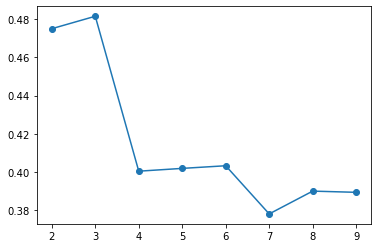

In [75]:
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')

plt.show()

Un k=3 semble pertinent pour la réalisation du clustering, ce coefficient de silhouette est le plus élevé, le plus représentatif

In [76]:
#Clustering K-Means en 3 clusters, introduction de notre modèle 'cls'
cls = cluster.KMeans(n_clusters=3)
cls.fit(X_scaled)

KMeans(n_clusters=3)

In [77]:
#Tableau des Centroïdes: 3 clusters dans sa version centrée réduite
#Comparaison simplifiée, les dimensions prenant la même importance!
centroids = cls.cluster_centers_
pd.DataFrame(centroids, columns=['gdpppp', 'gini'], index=['cluster0', 'cluster1', 'cluster2'])

,gdpppp,gini
cluster0,-0.528351,-0.390613
cluster1,1.515379,-0.841736
cluster2,-0.427324,1.253728


In [78]:
#Index trié des clusters
idk = np.argsort(cls.labels_)

#Affichage des observations selon leurs clusters
data_cls = pd.DataFrame(data_clustering.index[idk], cls.labels_[idk]).reset_index()
data_cls = data_cls.rename(columns={'index':'cluster'})

In [79]:
#Intégration des clusters dans notre dataframe "df_cls" par la méthode .merge()
#Jointure avec le dataframe initial selon les pays et condition 'inner'
data_cls = pd.merge(data_clustering, data_cls, on='country')
data_cls.head()

,country,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_Med,cluster
0,Albania,ALB,2008,1,100,728.89795,7297.0,3002678.0,0.30,2994.829902,0
1,Argentina,ARG,2008,1,100,254.08942,13220.0,40080160.0,0.45,5847.884654,2
2,Armenia,ARM,2008,1,100,366.61780,5611.0,2907618.0,0.26,1628.382785,0
3,Austria,AUT,2008,1,100,2958.07640,36193.0,8341532.0,0.28,16637.600204,1
4,Azerbaijan,AZE,2008,1,100,397.53983,8101.0,8821873.0,0.31,2357.429023,0


In [80]:
#Taille des 3 clusters, combien de pays dans chaque?
print(str(len(data_cls[data_cls['cluster'] == 0])) + " clusters dans la première partition")
print(str(len(data_cls[data_cls['cluster'] == 1])) + " clusters dans la seconde partition")
print(str(len(data_cls[data_cls['cluster'] == 2])) + " clusters dans la troisième partition")

52 clusters dans la première partition
28 clusters dans la seconde partition
35 clusters dans la troisième partition


In [81]:
#Pays du cluster 0
print(list(data_cls[data_cls['cluster'] == 0]['country']))

['Albania', 'Armenia', 'Azerbaijan', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Bhutan', "Côte d'Ivoire", 'Cameroon', 'Egypt', 'Georgia', 'Guinea', 'Croatia', 'Indonesia', 'India', 'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'Republic of Korea', 'Kosovo', "Lao People's Democratic Republic", 'Liberia', 'Sri Lanka', 'Lithuania', 'Latvia', 'Morocco', 'Republic of Moldova', 'The Former Yugoslav Republic of Macedonia', 'Mali', 'Montenegro', 'Mongolia', 'Mauritania', 'Niger', 'Nepal', 'Pakistan', 'Poland', 'Romania', 'Sudan', 'Serbia', 'Syrian Arab Republic', 'Tajikistan', 'Timor-Leste', 'United Republic Of Tanzania', 'Ukraine', 'Vietnam', 'Occupied Palestinian Territory', 'Yemen']


In [82]:
#Pays du cluster 1
print(list(data_cls[data_cls['cluster'] == 1]['country']))

['Austria', 'Belgium', 'Canada', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'Norway', 'Portugal', 'Slovakia', 'Slovenia', 'Sweden', 'Taiwan', 'United States']


In [83]:
#Pays du cluster 2
print(list(data_cls[data_cls['cluster'] == 2]['country']))

['Argentina', 'Bolivia', 'Brazil', 'Central African', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'Ghana', 'Guatemala', 'Honduras', 'Islamic Republic of Iran', 'Madagascar', 'Mexico', 'Mozambique', 'Malawi', 'Malaysia', 'Nigeria', 'Nicaragua', 'Panama', 'Peru', 'Philippines', 'Paraguay', 'Russian Federation', 'El Salvador', 'Swaziland', 'Thailand', 'Turkey', 'Uganda', 'Uruguay', 'Venezuela', 'South Africa', 'The Democratic Republic Of The Congo']


Choix des pays du cluster 1, car le gdpppp est plus important que pour les autres partitions, mais également un indice de gini très éloigné de 1 indiquant une meilleure répartition des revenus.

In [84]:
#Affichage des pays les plus contributeurs avec restriction selon le cluster 0
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame({'c_inertie':di, 'country':data_clustering.index, 
                                  'country_code': data_cls['country_code'], 'cluster': data_cls['cluster'], 
                                  'gdpppp': data_cls['gdpppp'], 'gini': data_cls['gini']}).sort_values(by='c_inertie',
                                                                                                   ascending=False)
ctr_indiv_inertie[ctr_indiv_inertie['cluster'] == 1]

,c_inertie,country,country_code,cluster,gdpppp,gini
62,22.258822,Luxembourg,LUX,1,73127.0,0.29
80,9.491295,Norway,NOR,1,49070.0,0.26
108,5.816931,United States,USA,1,43261.0,0.43
44,4.916111,Ireland,IRL,1,39268.0,0.30
96,4.823197,Sweden,SWE,1,34371.0,0.25
79,4.758962,Netherlands,NLD,1,38065.0,0.29
3,4.457267,Austria,AUT,1,36193.0,0.28
25,4.455265,Denmark,DNK,1,34130.0,0.26
47,4.317160,Iceland,ISL,1,36527.0,0.29
95,3.992412,Slovenia,SVN,1,27197.0,0.23


In [85]:
nb_cluster =10

#Normalisation des données
pays_info_norm = preprocessing.scale(X)
km = cluster.KMeans(n_clusters = nb_cluster).fit(pays_info_norm)

#On determine les pays qui sont les plus proches des centroides des clusters
i_pays_plus_proches, _ = pairwise_distances_argmin_min(km.cluster_centers_, pays_info_norm)
i_pays_plus_proches

array([33, 18, 84, 93, 62, 91, 63, 38, 23,  3], dtype=int64)

In [86]:
pays_representatifs_clr = data_clustering.iloc[i_pays_plus_proches].sort_values('gdpppp', ascending=False)
pays_representatifs_clr

,country_code,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_Med
country,,,,,,,,,
Luxembourg,LUX,2008,1,100,5780.837400,73127.0,485405.0,0.29,25217.562681
Austria,AUT,2008,1,100,2958.076400,36193.0,8341532.0,0.28,16637.600204
United Kingdom,GBR,2008,1,100,1416.580300,34048.0,62145097.0,0.34,21709.604470
Czech Republic,CZE,2008,1,100,1586.247100,23223.0,10425266.0,0.25,8235.293411
Latvia,LVA,2008,1,100,609.161250,15596.0,2171259.0,0.36,6764.474570
Serbia,SRB,2008,1,100,953.286560,10234.0,9060103.0,0.28,4879.750852
Peru,PER,2008,1,100,172.704120,7858.0,28562317.0,0.48,3330.533349
Guatemala,GTM,2011,1,100,38.463615,4367.0,14948801.0,0.57,2142.474753
Sudan,SDN,2009,1,100,148.521180,2345.0,42926047.0,0.34,1085.347059


Les 9 pays ci-dessous ont été sélectionnés selon leur représentation et contribution au sein du cluster.

In [87]:
#Liste des pays retenus 
pays_list = ['Luxembourg', 'Sweden', 'Spain', 'France', 'Ireland', 'Norway', 'United States', 'Denmark', 'Austria']
pays_code = ['LUX', 'SWE', 'ESP', 'FRA', 'IRL', 'NOR', 'USA', 'DNK', 'AUT']

## Visualisation des pays en 3 graphiques 

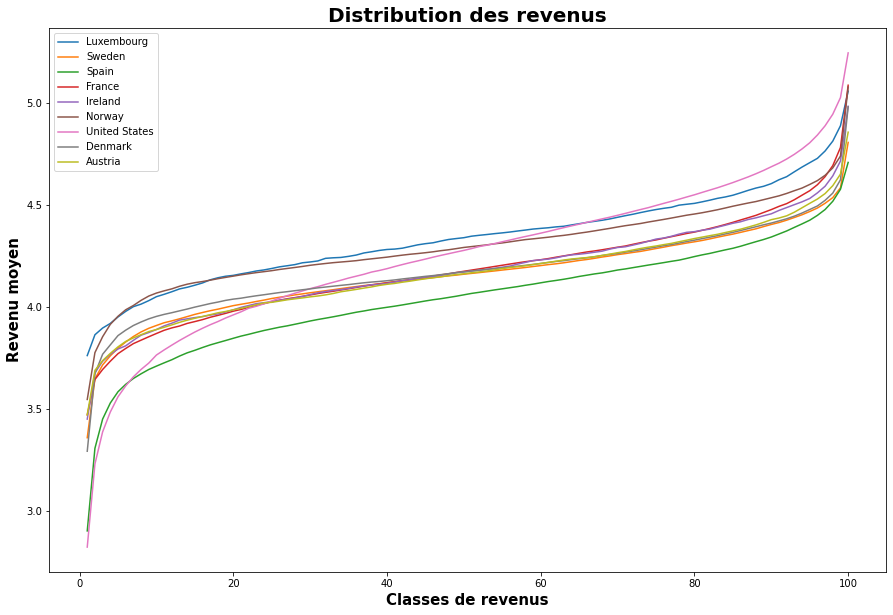

In [88]:
#Distribution des revenus 
plt.figure(figsize=(15,10))

for x in pays_list: 
    data = data_set[data_set.country == x]
    plt.plot(data['quantile'], np.log10(data['income']), label=x)

plt.title("Distribution des revenus", fontsize=20, fontweight='bold')
plt.xlabel("Classes de revenus", fontsize=15, fontweight='bold')
plt.ylabel("Revenu moyen", fontsize=15, fontweight='bold')
plt.legend()


plt.show()

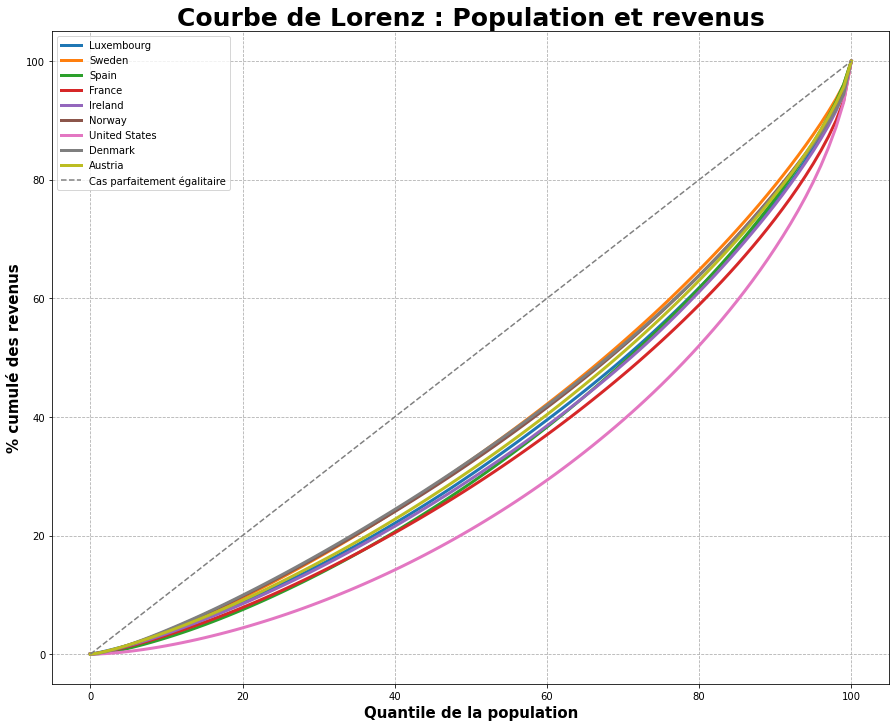

In [89]:
#Courbe de Lorenz
plt.figure(figsize = (15, 12))
list_gini = []

for count in pays_list:
    # revenus_total_pays : Revenus total sur les 100 centiles
    revenus_total_pays = data_set[data_set.country==count]['income'].sum()
    
    dep = data_set[data_set.country==count]['income'].values
    n = len(dep)
    
    # lorenz : Courbe de lorenz
    lorenz = (np.cumsum(np.sort(data_set[data_set.country==count]['income']))/revenus_total_pays)*100
    lorenz = np.append([0],lorenz) 
    x = np.append([0],data_set[data_set.country==count]['quantile'])    
    plt.plot(x,lorenz,linewidth=3, label=count)

    
plt.plot([0,100],[0,100],'grey',linestyle='--',linewidth=1.5, label='Cas parfaitement égalitaire')
plt.xlabel('Quantile de la population',fontsize=15,fontweight = 'bold')
plt.ylabel('% cumulé des revenus',fontsize=15,fontweight = 'bold')
plt.legend(loc='upper left',fontsize=10)
plt.grid(True,linestyle='--')
plt.title('Courbe de Lorenz : Population et revenus',fontsize=25,fontweight = 'bold')


plt.show()

La Suède et le Danemark présentent une distribution des revenus au sein de la population beaucoup plus égalitaire que les autres pays. A l'opposé, on peut distinguer une distribution de revenus plus inégalitaire pour les Etats-Unis et la France.

In [90]:
#Chargement des indices de Gini pour nos pays
#Source https://data.worldbank.org/indicator/SI.POV.GINI
gini_pays = pd.read_csv('Feuille indice-gini - Feuille 2.csv', skiprows=4)
gini_pays.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Sélection des pays retenus pour la démonstration
gini_pays = gini_pays.set_index('Country Code')
gini_pays = gini_pays.loc(axis=0)['LUX', 'SWE', 'ESP', 'FRA', 'IRL', 'NOR', 'USA', 'DNK', 'AUT']

In [92]:
# Sélection des indices de Gini pour les années de notre échantillon
gini_pays = gini_pays[['2004', '2006', '2007', '2008', '2009', '2010','2011']]
gini_pays

,2004,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,
LUX,30.2,30.9,31.1,32.6,31.2,30.5,32.1
SWE,26.1,26.4,27.1,28.1,27.3,27.7,27.6
ESP,33.3,33.5,34.1,34.2,34.9,35.2,35.7
FRA,30.6,29.7,32.4,33.0,32.7,33.7,33.3
IRL,33.6,32.7,31.9,30.9,32.7,32.3,32.9
NOR,31.6,26.4,27.1,27.0,26.2,25.7,25.3
USA,40.5,NaN,41.1,NaN,NaN,40.4,NaN
DNK,24.9,25.9,26.2,25.2,26.7,27.2,27.3
AUT,29.8,29.6,30.6,30.4,31.5,30.3,30.8


In [93]:
gini_pays.fillna(0)

,2004,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,
LUX,30.2,30.9,31.1,32.6,31.2,30.5,32.1
SWE,26.1,26.4,27.1,28.1,27.3,27.7,27.6
ESP,33.3,33.5,34.1,34.2,34.9,35.2,35.7
FRA,30.6,29.7,32.4,33.0,32.7,33.7,33.3
IRL,33.6,32.7,31.9,30.9,32.7,32.3,32.9
NOR,31.6,26.4,27.1,27.0,26.2,25.7,25.3
USA,40.5,0.0,41.1,0.0,0.0,40.4,0.0
DNK,24.9,25.9,26.2,25.2,26.7,27.2,27.3
AUT,29.8,29.6,30.6,30.4,31.5,30.3,30.8


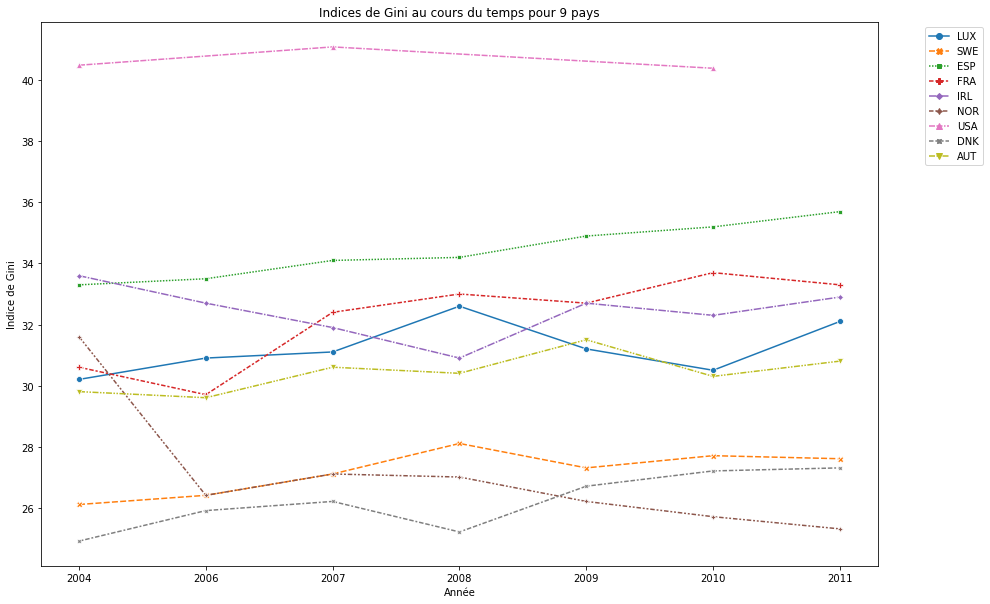

In [94]:
# Représentation graphique des indices de Gini pour nos différents pays
gini_T = gini_pays.T


_ = plt.figure(figsize=(15,10))
_ = sns.lineplot(data=gini_T, markers=True)
_ = plt.title('Indices de Gini au cours du temps pour 9 pays')
_ = plt.xlabel('Année')
_ = plt.ylabel('Indice de Gini')
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

_ = plt.show()


Dans la plupart des pays on constate un indice de Gini plus ou moins stable, il n'y a pas de "réels changements" sur cette période. Mais en prenant l'interprétation au cas par cas, pays par pays, on peut relever quelques points de dégradation pour la France, l'Espagne et pour la Suède. Une hausse de l'indice expliquant plus d'inégalité de revenu et de patrimoine sur cette courte période de 2004 à 2011, avec 2005 non représentée ici.

In [95]:
#Utilisation de la fonction .rank() pour déterminer la position de chaque pays, dont la France
gini_group = pd.DataFrame(ctr_indiv_inertie.groupby(['country_code', 'country']).gini.mean()).reset_index()
gini_group['rang'] = gini_group['gini'].rank(ascending=True)
gini_group.head()

,country_code,country,gini,rang
0,ALB,Albania,0.30,23.5
1,ARG,Argentina,0.45,90.5
2,ARM,Armenia,0.26,6.5
3,AUT,Austria,0.28,14.0
4,AZE,Azerbaijan,0.31,30.5


In [96]:
#5 pays ayant l'indice de Gini le plus élevé
gini_group.sort_values(by='gini', ascending=False).head()

,country_code,country,gini,rang
114,ZAF,South Africa,0.67,115.0
40,HND,Honduras,0.60,114.0
21,COL,Colombia,0.57,112.5
39,GTM,Guatemala,0.57,112.5
11,BOL,Bolivia,0.56,110.5


In [97]:
#5 pays ayant l'indice de Gini le plus faible
gini_group.sort_values(by='gini', ascending=True).head()

,country_code,country,gini,rang
96,SVN,Slovenia,0.23,1.0
95,SVK,Slovakia,0.25,3.0
97,SWE,Sweden,0.25,3.0
24,CZE,Czech Republic,0.25,3.0
26,DNK,Denmark,0.26,6.5


In [98]:
#Position de la France 
gini_group[gini_group.country == 'France']

,country_code,country,gini,rang
33,FRA,France,0.33,42.5


A ce stade, nous avons une idée plus précise du revenu moyen des pays, et de la répartition des richesses. D'un côté des pays riches avec de fortes inégalités ou pas, et des pays comme le notre pour qui les inégalités entre les classes ont eu tendances à se creuser en quelques années. Voyons comment les classes de revenu des parents peuvent interagir au sein d'un pays, et auprès de leurs enfants.

# Mission3

## Étude des classes de revenu des parents

Dans l'état actuel, nous avons à disposition deux des trois variables explicatives souhaitées :

le revenu moyen du pays,

l'indice de Gini du pays.

Il manque donc, pour un individu, la classe de revenu de ses parents.

Ici nous supposons que l'on associe à chaque individu i une unique classe 'c_i_parent', quel que soit le nombre de parents de i.

Il est donc question de simuler cette information grâce à un coefficient (propre à chaque pays ) mesurant une corrélation entre le revenu de l'individu et le revenu de ses parents. Ce coefficient sera ici appelé coefficient d'élasticité pj, il mesure la mobilité intergénérationnelle du revenu.

Ce coefficient est déterminé par une régression linéaire simple dans laquelle le logarithme du revenu de l'enfant est une fonction du logarithme du revenu des parents: ln(Ychild) = α + pj ln(Yparent) + ϵ

Le coefficient d'élasticité est donné pour certains pays, sous le nom d'IGE Income (relative IGM in income). Ou bien des estimations provenant de multiples études, extrapolées à différentes régions du monde: elles se trouvent dans le fichier elasticity.txt. Attention, ces données sont parfois anciennes.

### Ci-dessous un aperçu de nos deux sources de données

In [99]:
#un coefficient d'élasticité pj,mesure la mobilité intergénérationnelle du revenu 
#Fichier elasticity.txt
elasticity_file = pd.read_csv('text.txt', sep = "\t")[:16]
elasticity_file



,Coefficients of intergenerational elasticity between parents’ and
0,children’s income
1,| Base case | Optim...
2,| | (high...
3,----------------------------------------------...
4,Nordic European countries | 0.2 | ...
5,and Canada | | ...
6,----------------------------------------------...
7,Europe (except nordic | 0.4 | ...
8,countries) | | ...
9,----------------------------------------------...


In [100]:
#Le coefficient d'élasticité est donné pour certains pays, sous le nom d'IGE Income (relative IGM in income).
#Chargement et traitement des données GDIM
gdim = pd.read_csv('GDIMMay - Feuille 7.csv').loc[:, ['countryname', 'iso3', 'region', 'IGEincome']]
gdim.rename(columns={'countryname': 'country', 'iso3' : 'country_code'}, inplace=True)
gdim.drop_duplicates(inplace=True)
gdim.drop_duplicates(subset=['country'], keep = 'last', inplace=True)
display(gdim.head(10))
display(gdim.shape)

,country,country_code,region,IGEincome
0,Afghanistan,AFG,South Asia,NaN
12,Angola,AGO,Sub-Saharan Africa,NaN
60,Albania,ALB,Europe & Central Asia,0.815874
84,Argentina,ARG,Latin America & Caribbean,NaN
99,Armenia,ARM,Europe & Central Asia,NaN
183,Australia,AUS,High income,0.275000
243,Austria,AUT,High income,0.245267
279,Azerbaijan,AZE,Europe & Central Asia,NaN
351,Belgium,BEL,High income,0.183176
405,Benin,BEN,Sub-Saharan Africa,0.855116


(150, 4)

In [101]:
#Isolement des pays sans valeur pour la variable 'IGEincome'
missing_gdim = gdim[gdim['IGEincome'].isna()]
display(missing_gdim.tail())
display(len(missing_gdim))

,country,country_code,region,IGEincome
6298,"Venezuela, RB",VEN,Latin America & Caribbean,NaN
6366,Vanuatu,VUT,East Asia & Pacific,NaN
6378,West Bank and Gaza,PSE,Middle East & North Africa,NaN
6390,"Yemen, Rep.",YEM,Middle East & North Africa,NaN
6492,Zambia,ZMB,Sub-Saharan Africa,NaN


77

In [102]:
#Identification des pays sans valeur pour la variable 'IGEincome'
missing_countries_gdim = missing_gdim['country_code'].unique()
missing_countries_gdim = list(missing_countries_gdim)
len(missing_countries_gdim)

77

In [103]:
#Visualisation des régions concernées 
list(missing_gdim.region.unique())

['South Asia',
 'Sub-Saharan Africa',
 'Latin America & Caribbean',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'High income',
 'East Asia & Pacific']

In [104]:
#Visualisation des pays concernés par la région 'High income'
missing_gdim[missing_gdim['region'] == 'High income']['country'].unique()

array(['Estonia', 'Hungary', 'Iceland', 'Israel', 'Lithuania', 'Poland',
       'Uruguay'], dtype=object)

In [105]:
#Boucle itérative afin d'imputer les valeurs NaN sur la variable 'IGEincome'
for code in missing_countries_gdim :
    if list(gdim.loc[gdim['country_code'] == code, 'region']) == ['South Asia']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.50
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Sub-Saharan Africa']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Latin America & Caribbean']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.66
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['Europe & Central Asia']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.40                                                               
    elif list(gdim.loc[gdim['country_code'] == code, 'region']) == ['East Asia & Pacific']:
        gdim.loc[gdim['country_code'] == code, 'IGEincome'] = 0.50
    else : gdim.loc[gdim['country_code'] == code, 'IGEincome'] =  0.40     

In [106]:
#Jointure avec notre dataframe 'data_set' et celui obtenu 'gdim'
#'IGEincome' sera renommé en 'pj'
data_income_mobility = pd.merge(data_set, gdim[['country_code', 'IGEincome']], how='left', on='country_code')
data_income_mobility.rename(columns={'IGEincome': 'pj'}, inplace=True)
data_income_mobility.head()

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_Med,pj
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0,0.3,2994.829902,0.815874
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0,0.3,2994.829902,0.815874
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0,0.3,2994.829902,0.815874
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0,0.3,2994.829902,0.815874
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0,0.3,2994.829902,0.815874


In [107]:
#Vérification des éventuelles valeurs manquantes
last_list_missing_countries = list(data_income_mobility[data_income_mobility['pj'].isna()]['country'].unique())
last_list_missing_countries

['Kosovo', 'Syrian Arab Republic']

La Syrie est un pays d'Asie de l'Ouest > pj = 0.50\ Le Kosovo est un pays d'Europe du Sud > pj = 0.40

In [108]:
#Imputation des 2 dernières valeurs NaN dans le dataframe 
for country in last_list_missing_countries :
    if list(data_income_mobility[data_income_mobility['country'] == "Kosovo"]):
        data_income_mobility.loc[data_income_mobility['country'] == country, 'pj'] = 0.40
    else : 
        data_income_mobility.loc[data_income_mobility['country'] == country, 'pj'] = 0.50

In [109]:
#Dernière validation de la complétude du dataframe "data_income_mobility"
data_income_mobility.isna().any()

country_code    False
country         False
year            False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
population      False
gini            False
income_Med      False
pj              False
dtype: bool

Les booléens sont tous en False, visualisons le jeu de données.

In [110]:
#Visualisation des premières lignes de l'échantillon 
display(data_income_mobility.head())
display(data_income_mobility.shape)

,country_code,country,year,quantile,nb_quantiles,income,gdpppp,population,gini,income_Med,pj
0,ALB,Albania,2008,1,100,728.89795,7297.0,3002678.0,0.3,2994.829902,0.815874
1,ALB,Albania,2008,2,100,916.66235,7297.0,3002678.0,0.3,2994.829902,0.815874
2,ALB,Albania,2008,3,100,1010.91600,7297.0,3002678.0,0.3,2994.829902,0.815874
3,ALB,Albania,2008,4,100,1086.90780,7297.0,3002678.0,0.3,2994.829902,0.815874
4,ALB,Albania,2008,5,100,1132.69970,7297.0,3002678.0,0.3,2994.829902,0.815874


(11600, 11)

L'échantillon contient 11600 individus, notre échantillon de travail a désormais son coefficient d'élasticité qui mesure la mobilité intergénérationnelle du revenu. A partir des 3 variables explicatives le revenu moyen du pays, l'indice de Gini du pays et le coefficient d'élasticité, nous pourrons générer des classes de revenu des parents.

### Revenus des parents selon une loi normale (de moyenne 0 et d'écart-type 1)

Les revenus des parents (exprimés en logs) sont générés de façon aléatoires selon une loi normale. La moyenne et variance n'ont aucune incidence sur le résultat final. n doit-être supérieur à 1000 fois le nombre de quantiles.

In [111]:
pj = 0.33                #Coefficient d'élasticité d'un pays j (ici la France sera prise pour exemple)
nb_quantiles = 100       #Nombre de quantiles (nombre de classes de revenu)
n = 1000*nb_quantiles    #Taille de l'échantillon

In [112]:
#Utilisation de scipy pour générer aléatoirement la variable 'ln(Yparent)'
ln_y_parent = st.norm(0,1).rvs(size=n)

### Terme d'erreur ϵ selon une loi normale (de moyenne 0 et d'écart-type 1)

Génération aléatoire d'une réalisation du terme d'erreur epsilon.

In [113]:
#Utilisation de scipy pour générer aléatoirement epsilon
residues = st.norm(0,1).rvs(size=n)

# Revenus des enfants ychild

Les valeurs des revenus enfants ychild sont calculées pour une valeur donnée de pj (ici 0.33). A ce stade, ychild contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.

In [114]:
#Génération des revenus des parents et des enfants selon les éléments cités ci-dessus
#Application de la fonction generate_incomes()
def generate_incomes(n, pj):
    ln_y_parent = st.norm(0,1).rvs(size=n)
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

y_child, y_parents = generate_incomes(n, pj)

### Calcul des classes de revenu des enfants et des parents selon les n individus générés précédemment

Pour chacun des n individus générés, les classes de revenu sont calculées selon ychild et yparent.

In [115]:
#Création d'un échantillon nommé "sample" via deux fonctions répondant aux critères liés aux quantiles
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

sample = compute_quantiles(y_child, y_parents, nb_quantiles)

In [116]:
#Visualisation des 5 premières classes de revenu enfants et parents
display(sample.head())
display(sample.shape)

,y_child,y_parents,c_i_child,c_i_parent
0,6.764729,3.185387,97,88
1,5.957181,2.979523,96,87
2,1.635405,1.509619,69,67
3,0.122206,1.044876,3,52
4,0.871087,5.818452,45,97


(100000, 4)

L'échantillon a été réalisé de façon aléatoire, d'un côté nous avons les individus, et de l'autre, ce qui nous intéresse, les classes de revenu enfants et parents.

## Estimation de la distribution conditionnelle des classes de revenus parents pour chaque classe enfant

Les calculs sont toujours dépendants du coefficient d'élasticité pj du pays, dans notre cas d'exemple nous sommes toujours en pj = 0.33 pour la France.

In [117]:
#utilisation des fonctions de distribution et de probabilité conditionnelles
def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]


cd = conditional_distributions(sample, nb_quantiles)

In [118]:
#Itération selon nos classes de revenu
nb_quantiles = 101
cd = conditional_distributions(sample, nb_quantiles)

class myInformativeException(Exception):
    def __init__(self, count):
        self.count = count
proba = []
try:        
    for x, y in zip(sample['c_i_child'], sample['c_i_parent']):
        p = proba_cond(y, x, cd)
        proba.append(p)
except myInformativeException as e:
    print("Error on ", e.count)

sample['proba'] = proba
sample.head()

,y_child,y_parents,c_i_child,c_i_parent,proba
0,6.764729,3.185387,97,88,0.015
1,5.957181,2.979523,96,87,0.018
2,1.635405,1.509619,69,67,0.012
3,0.122206,1.044876,3,52,0.006
4,0.871087,5.818452,45,97,0.008


Graphiquement nous pourrons mieux comprendre la corrélation entre le revenu de l'individu et le revenu de ses parents.

## Visualisation des distributions conditionnelles

A des fins de vérification, nous pouvons créer un graphique représentant ces distributions conditionnelles. Voici 2 exemples pour une population segmentée en 10 classes, pour 2 valeurs de pj: l'une traduisant une forte mobilité (0.1) et l'autre une très faible mobilité (0.9).

In [119]:
#Fonction permettant de visualiser le comportement des distributions conditionnelles 
def plot_conditional_distributions_high(p, cd, nb_quantiles):
    plt.figure(figsize = (10, 6))
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Forte mobilité " + "p=" + str(p), fontsize=15, fontweight='bold')
    plt.legend()
    plt.xlabel("quantile parents", fontsize=10, fontweight='bold')
    plt.ylabel("probabilité du quantile enfant", fontsize=10, fontweight='bold')
    
    
    plt.show()

### Voici 2 exemples pour une population segmentée en 10 classes, pour 2 valeurs de pj :

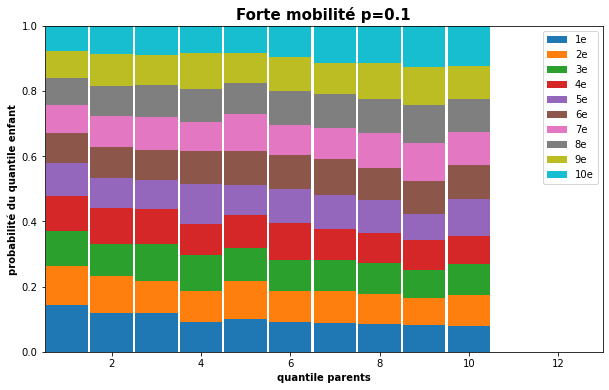

In [120]:
#Exemple d'une forte mobilité avec un pj = 0.1
pj_strong = 0.1                
nb_quantiles_strong = 10       
n_strong  = 1000*nb_quantiles_strong   

y_child_strong, y_parents_strong = generate_incomes(n_strong, pj_strong)
sample_strong = compute_quantiles(y_child_strong, y_parents_strong, nb_quantiles_strong)
cd_strong = conditional_distributions(sample_strong, nb_quantiles_strong)
plot_conditional_distributions_high(pj_strong, cd_strong, nb_quantiles_strong)

In [121]:
#Fonction permettant de visualiser le comportement des distributions conditionnelles 
def plot_conditional_distributions_low(p, cd, nb_quantiles):
    plt.figure(figsize = (10, 6))
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("Faible mobilité " + "p=" + str(p), fontsize=15, fontweight='bold')
    plt.legend()
    plt.xlabel("quantile parents", fontsize=10, fontweight='bold')
    plt.ylabel("probabilité du quantile enfant", fontsize=10, fontweight='bold')
    
    
    plt.show()

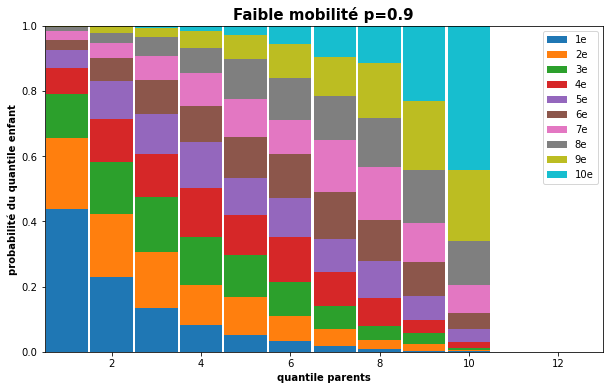

In [122]:
#Exemple d'une très faible mobilité avec un pj = 0.9
pj_low = 0.9                
nb_quantiles_low = 10       
n_low  = 1000*nb_quantiles_low   

y_child_low, y_parents_low = generate_incomes(n_low, pj_low)
sample_low = compute_quantiles(y_child_low, y_parents_low, nb_quantiles_low)
cd_low = conditional_distributions(sample_low, nb_quantiles_low)
plot_conditional_distributions_low(pj_low, cd_low, nb_quantiles_low)

### Suppression des individus

Pour éviter toute confusion, les individus générés sont supprimés (car inutiles pour la suite), seules les distributions conditionnelles sont conservées.

In [123]:
sample = sample.iloc[:, 2:]
sample.head()

,c_i_child,c_i_parent,proba
0,97,88,0.015
1,96,87,0.018
2,69,67,0.012
3,3,52,0.006
4,45,97,0.008


## Nouvel échantillon : 500 fois plus grand que celui de la World Income Distribution

Celui-ci sera créé à partir de la WID. Pour chaque individu de la World Income Distribution, il y aura 499 "clones". La taille du nouvel échantillon sera donc 500 fois plus grand que celui de la World Income Distribution.

## Attribution des classes parents aux 500 individus de chaque pays

Pour chaque 'ci child' et chaque pays, il y a donc 500 individus. Maintenant il est question d'attribuer aux 500 individus leurs classes 'ci parent' conformément aux distributions trouvées précédemment. Par exemple, si P(ci parent=8|ci child=5,Pj=0.9) = 0.03 , alors la classe 'ci parent' sera 8 à 15 des 500 individus du pays j ayant ci child=5 , car 500*0.03 = 15

In [124]:
#Cet échantillon sera nommé "data_wid500", clone représentatif des individus de la WID
data_wid500 = data_income_mobility[['country_code', 'country', 'quantile', 'population', 
                                'income', 'income_Med', 'gini', 'pj']]

data_wid500 = pd.concat([data_wid500]*500, ignore_index=True)
display(data_wid500.head())
display(data_wid500.shape)

,country_code,country,quantile,population,income,income_Med,gini,pj
0,ALB,Albania,1,3002678.0,728.89795,2994.829902,0.3,0.815874
1,ALB,Albania,2,3002678.0,916.66235,2994.829902,0.3,0.815874
2,ALB,Albania,3,3002678.0,1010.91600,2994.829902,0.3,0.815874
3,ALB,Albania,4,3002678.0,1086.90780,2994.829902,0.3,0.815874
4,ALB,Albania,5,3002678.0,1132.69970,2994.829902,0.3,0.815874


(5800000, 8)

In [125]:

# Mise en forme 
data_wid500.rename(columns={'quantile': 'c_i_child', 'income': 'y_child', 'gini': 'Gj'}, inplace=True)
data_wid500 = data_wid500[['country', 'c_i_child', 'y_child', 'Gj', 'pj']]

data_wid500.head(3)


,country,c_i_child,y_child,Gj,pj
0,Albania,1,728.89795,0.3,0.815874
1,Albania,2,916.66235,0.3,0.815874
2,Albania,3,1010.91600,0.3,0.815874


In [126]:
import random
# Nombre de d'individus générés aléatoirement 1_000 * nb_quantiles
n=100_000

# Préparation des données
nb_quantiles=100
key3 = data_wid500['country'].drop_duplicates().values
c_i_parent = []
data_wid500['c_i_parent'] = 0



In [127]:
# Pour chaque pays
for pays in key3:
    # Selection du pays
    y_child, y_parent = generate_incomes(n, data_wid500.loc[data_wid500['country'] == pays, 'pj'].iloc[0]) 
    # Création des quantiles
    sample = compute_quantiles(y_child, y_parent, nb_quantiles) 
    # Création de l'arrondi du nombre d'individus attendu en fonction des distributions conditionnelles
    cd = np.round(conditional_distributions(sample, nb_quantiles) * 500)
    # Typage en entier
    cd = np.array(cd, int)
    # Passage en dataframe
    cdd = pd.DataFrame(cd)
    # Création de la transposée
    cdt = cdd.T
   # Pour chaque c_i_child
    for cic in np.arange(100):
        # Création d'une liste d'index des valeurs supérieur à 5 grâce à la transposée
        list_random = cdt.loc[cdt[cic] > 5, cic].index.tolist()

        # Si la somme des individus par pays et c_i_child est inférieure à 500 individus
        if cdd.loc[cdd.index == cic].sum().sum() < 500:        
            # Calcul du nombre de valeurs manquantes
            diff = 500 - cdd.loc[cdd.index == cic].sum().sum()
            # Prélèvement d'index dans la liste des valeurs supérieures à 5 individus
            al_ind = random.sample(list_random, diff)
            # Ajout de 1 pour les individus prélévés
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] + 1

        # Si la somme des individus par pays et c_i_child est supérieure à 500 individus
        elif cdd.loc[cdd.index == cic].sum().sum() > 500:
            # Calcul du nombre de valeurs en trop
            diff = cdd.loc[cdd.index == cic].sum().sum() - 500
            # Prélèvement d'index dans la liste des valeurs supérieures à 5 individus
            al_ind = random.sample(list_random, diff)
            # Soustraction de 1 pour les individus prélévés
            cdd.loc[cdd.index == cic, al_ind] = cdd.loc[cdd.index == cic, al_ind] - 1
         # Pour chaque c_i_parent
        for cip in range(0,100):
            # On étend la liste c_i_parent de l'index + 1 de la valeur contenu en c_i_child, c_i_parent
            c_i_parent.extend(np.repeat(cip + 1, cdd.iloc[cic, cip], axis=0))
    # On affecte les valeurs de la liste c_i_parent à la colonne c_i_parent de notre dataframe principale
    data_wid500.loc[(data_wid500['country'] == pays), 'c_i_parent'] = c_i_parent
    # On reinitialise la liste c_i_parent
    c_i_parent =[] 

       

In [128]:
data_wid500.tail()

,country,c_i_child,y_child,Gj,pj,c_i_parent
5799995,The Democratic Republic Of The Congo,97,911.78340,0.44,0.707703,100
5799996,The Democratic Republic Of The Congo,98,1057.80740,0.44,0.707703,100
5799997,The Democratic Republic Of The Congo,99,1286.60290,0.44,0.707703,100
5799998,The Democratic Republic Of The Congo,100,2243.12260,0.44,0.707703,100
5799999,Lithuania,41,4882.14065,0.33,0.400000,100


In [129]:
# Suppression de la variable c_i_child inutile pour la mission 4
data_wid500.drop(columns='c_i_child', inplace=True)

In [130]:
# Création d'un dataframe avec la variable revenu moyen du pays
y_child_moyen_data = data_wid500.groupby(by='country').mean()
y_child_moyen_data.reset_index(inplace=True)
y_child_moyen_data = y_child_moyen_data[['country', 'y_child']]
y_child_moyen_data.rename(columns={'y_child': 'mj'}, inplace=True)

y_child_moyen_data.head(3)

,country,mj
0,Albania,2994.829902
1,Argentina,5847.884654
2,Armenia,1628.382785


In [131]:
# Ajout de la colonne y_child_moyen
data_wid500_2 = pd.merge(data_wid500, y_child_moyen_data, on='country')
data_wid500_2.head(3)

,country,y_child,Gj,pj,c_i_parent,mj
0,Albania,728.89795,0.3,0.815874,1,2994.829902
1,Albania,916.66235,0.3,0.815874,1,2994.829902
2,Albania,1010.91600,0.3,0.815874,1,2994.829902


In [132]:
# Ajout des colonnes 'logarithmes'
data_wid500_2['ln_y_child'] = np.log(data_wid500_2['y_child'])
data_wid500_2['ln_mj'] = np.log(data_wid500_2['mj'])

data_wid500_2.tail(3)

,country,y_child,Gj,pj,c_i_parent,mj,ln_y_child,ln_mj
5799997,The Democratic Republic Of The Congo,1057.8074,0.44,0.707703,100,276.016044,6.963954,5.620459
5799998,The Democratic Republic Of The Congo,1286.6029,0.44,0.707703,100,276.016044,7.159761,5.620459
5799999,The Democratic Republic Of The Congo,2243.1226,0.44,0.707703,100,276.016044,7.715624,5.620459


In [133]:
data_wid500_2.groupby('country').count().shape

(116, 7)

In [134]:
# Enregistrement du fichier
data_wid500_2.to_csv('Analyse.csv', index=False)

---------------------------------------------

# Modélisation : étude de l'ANOVA

Ici il sera question d'expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenu des parents, etc. L'Analyse de la Variance permettra d'expliquer l'influence de notre variable explicative, le pays de l'individu. Puis pour finir la performance du modèle sera étudiée.